#Road Network Analysis

Install packages

In [ ]:
!pip install osmnx
!pip install matplotlib==3.1.3

     |████████████████████████████████| 93 kB 842 kB/s 
     |████████████████████████████████| 62 kB 394 kB/s 
     |████████████████████████████████| 994 kB 23.9 MB/s 
     |████████████████████████████████| 1.0 MB 54.7 MB/s 
     |████████████████████████████████| 6.3 MB 44.5 MB/s 
     |████████████████████████████████| 10.3 MB 56.3 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompat

     |████████████████████████████████| 13.1 MB 97 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import osmnx as ox
from IPython.display import Image
import networkx
import matplotlib.pyplot as plt
import numpy as np
import folium
%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.1'

Use osmnx to obtain and plot a network representation of Paysandú's road network 

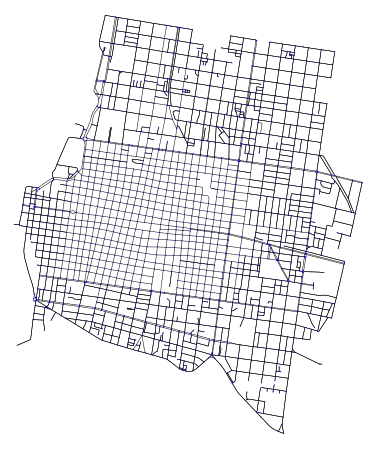

In [ ]:
# No need to change this code
G = ox.graph_from_place('Paysandu, Uruguay', simplify=True, network_type='drive')
fig, ax = ox.plot_graph(G, bgcolor="white", node_color="blue",  node_size=1, edge_color="black", edge_linewidth=0.5, dpi=1000)

Visualize the network

Visualize the network as a "folium" (aka on top of a scrollable map)

In [ ]:
# No need to change this code 
ox.plot_graph_folium(G, graph_map=None, popup_attribute=None, 
                      tiles='cartodbpositron', zoom=1, fit_bounds=True, 
                      edge_width=1, edge_opacity=1)

Output hidden; open in https://colab.research.google.com to view.

## Describe network:

Plot the degree distribution and highlight the nodes in the largest connected component. 

### Degree Distribution:
See code [here](https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html)

Text(0, 0.5, '# of Nodes')

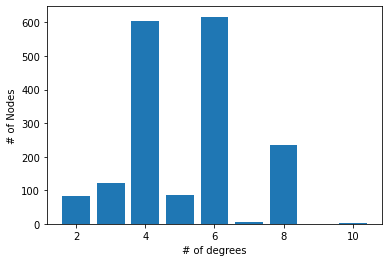

In [ ]:
import matplotlib.pyplot as plt
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("# of degrees")
plt.ylabel("# of Nodes")

Calculate statistics on the network such as betweeness centrality, eigenvalue centrality, closeness centrality etc

In [ ]:
# No need to change the code in this block
extended_stats = ox.extended_stats(G, bc=True, cc=True)
print(extended_stats.keys())

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:405: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


dict_keys(['avg_neighbor_degree', 'avg_neighbor_degree_avg', 'avg_weighted_neighbor_degree', 'avg_weighted_neighbor_degree_avg', 'degree_centrality', 'degree_centrality_avg', 'clustering_coefficient', 'clustering_coefficient_avg', 'clustering_coefficient_weighted', 'clustering_coefficient_weighted_avg', 'pagerank', 'pagerank_max_node', 'pagerank_max', 'pagerank_min_node', 'pagerank_min', 'closeness_centrality', 'closeness_centrality_avg', 'betweenness_centrality', 'betweenness_centrality_avg'])


Visualize **Betweenness Centrality**

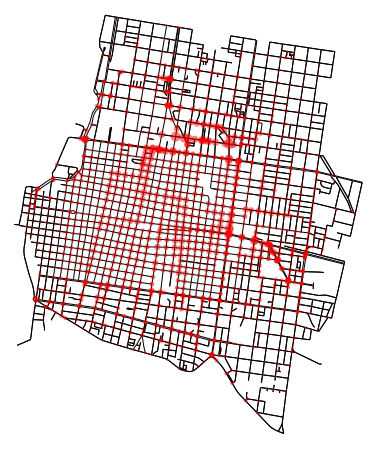

In [ ]:
centrality_values=[extended_stats['betweenness_centrality'][node] for node in G.nodes()]
centrality_values = (np.asarray(centrality_values)- min(centrality_values)) / (max(centrality_values) - min(centrality_values))
ns = 100*centrality_values
fig, ax = ox.plot_graph(G, node_size=ns, node_color='r', node_alpha=0.5, bgcolor="w",  edge_color="black")

Visualize **Eigenvalue Centrality**

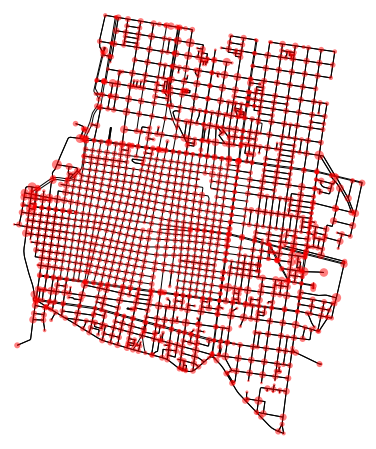

In [ ]:
centrality_values=[extended_stats['katz'][node] for node in G.nodes()]
centrality_values = (np.asarray(centrality_values)- min(centrality_values)) / (max(centrality_values) - min(centrality_values))
ns = 100*centrality_values
fig, ax = ox.plot_graph(G, node_size=ns, node_color='r', node_alpha=0.5, bgcolor="w",  edge_color="black")

Visualize **Clustering Coefficient**

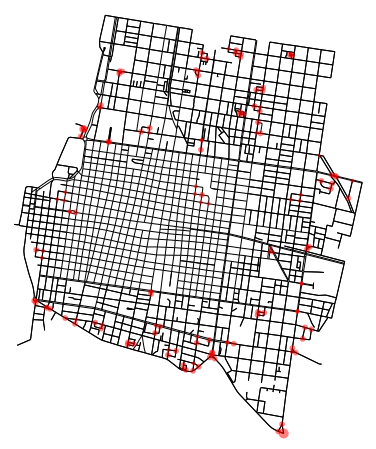

In [ ]:
centrality_values=[extended_stats['clustering_coefficient'][node] for node in G.nodes()]
centrality_values = (np.asarray(centrality_values)- min(centrality_values)) / (max(centrality_values) - min(centrality_values))
ns = 100*centrality_values
fig, ax = ox.plot_graph(G, node_size=ns, node_color='r', node_alpha=0.5, bgcolor="w",  edge_color="black")

Visualize **Degree Centrality**

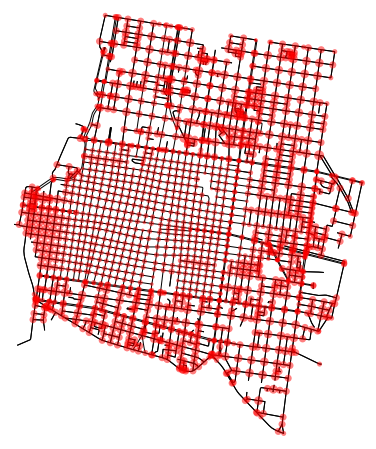

In [ ]:
centrality_values=[extended_stats['degree_centrality'][node] for node in G.nodes()]
centrality_values = (np.asarray(centrality_values)- min(centrality_values)) / (max(centrality_values) - min(centrality_values))
ns = 100*centrality_values
fig, ax = ox.plot_graph(G, node_size=ns, node_color='r', node_alpha=0.5, bgcolor="w",  edge_color="black")

Visualize **Closeness Centrality**

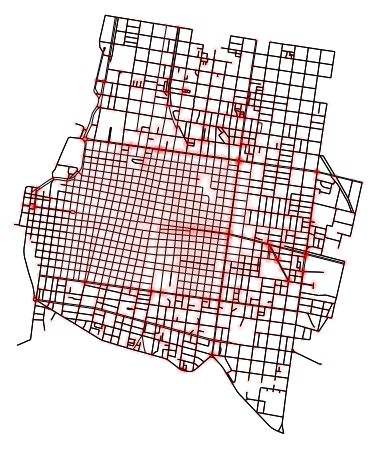

In [ ]:
centrality_values=[extended_stats['closeness_centrality'][node] for node in G.nodes()]
centrality_values = (np.asarray(centrality_values)- min(centrality_values)) / (max(centrality_values) - min(centrality_values))
ns = 100*centrality_values
fig, ax = ox.plot_graph(G, node_size=ns, node_color='r', node_alpha=0.1, bgcolor="w",  edge_color="black")